In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for plots
sns.set_style('whitegrid')

# Enable inline plots
%matplotlib inline

In [45]:
# Load the Iris dataset from local CSV file
iris_df = pd.read_csv('iris.csv')

# Convert species to categorical data type
iris_df['species'] = pd.Categorical(iris_df['species'])

# Display basic information about the dataset
print("Dataset shape:", iris_df.shape)
print("\nFirst 5 rows of the dataset:")
iris_df.head()

Dataset shape: (45, 5)

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
print("1. Features and their types:")
iris_df.dtypes

1. Features and their types:


sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [47]:
# Numerical features
numeric_features = iris_df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", numeric_features)

# Categorical features
categorical_features = iris_df.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features:", categorical_features)

Numerical features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Categorical features: ['species']


2. Creating histograms for feature distributions...


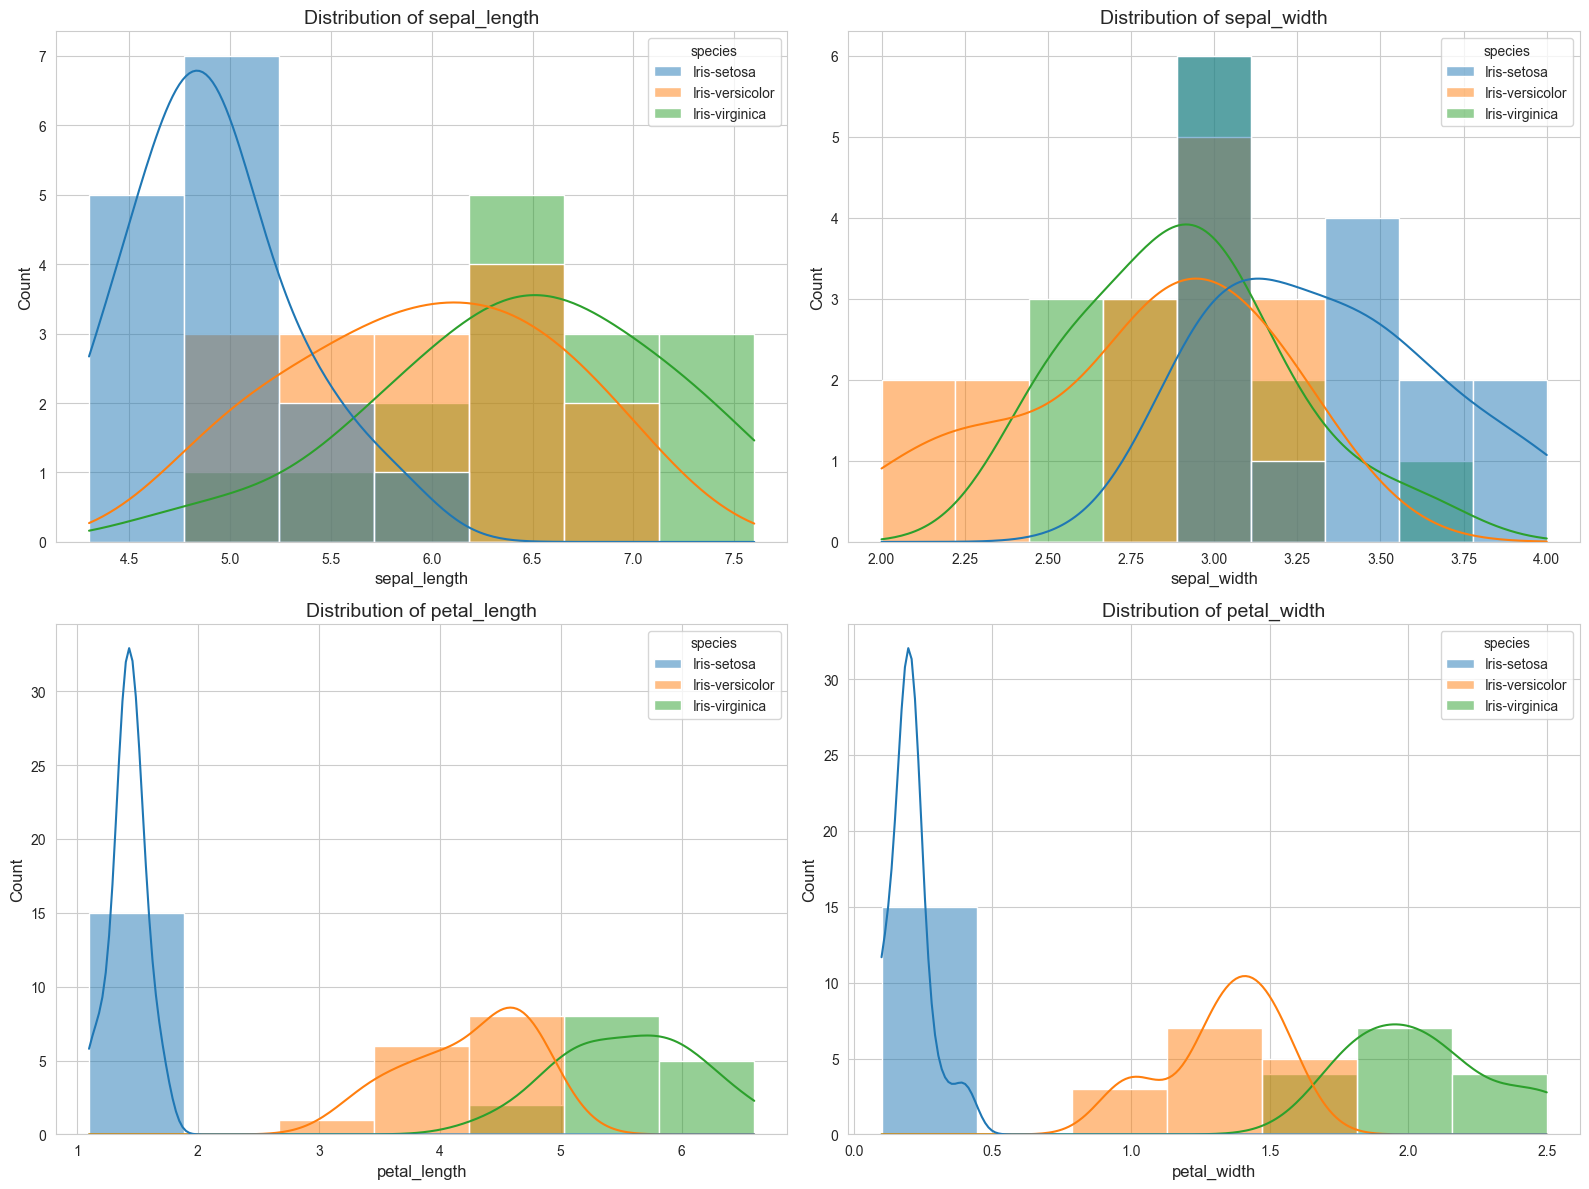

In [48]:
print("2. Creating histograms for feature distributions...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

3. Creating boxplots for feature distributions...


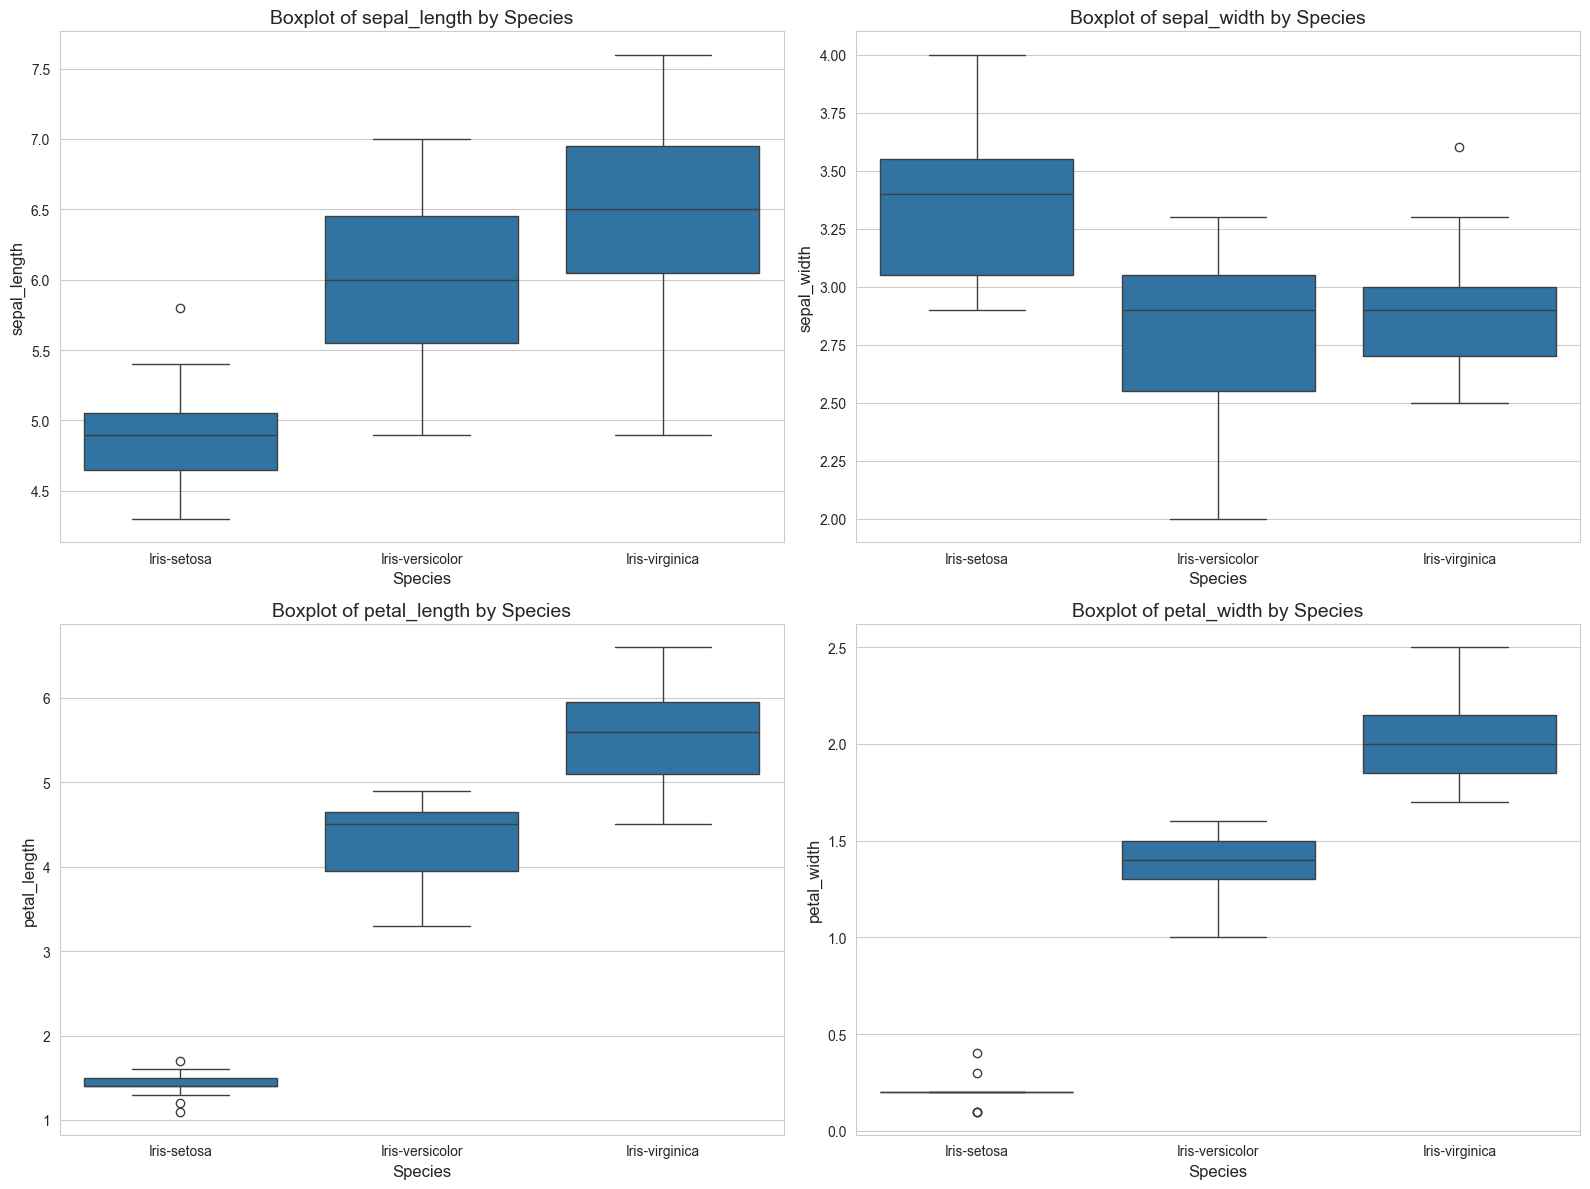

In [49]:
print("3. Creating boxplots for feature distributions...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x='species', y=feature, data=iris_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Species', fontsize=14)
    axes[i].set_xlabel('Species', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

In [50]:
print("4. Distribution comparisons and outliers:")

# Function to identify outliers using IQR method
def find_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

4. Distribution comparisons and outliers:


In [51]:
# Check for outliers in each numerical feature
for feature in numeric_features:
    print(f"\nOutliers in {feature}:")
    outliers = find_outliers(iris_df, feature)
    if len(outliers) > 0:
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[[feature, 'species']])
    else:
        print("No outliers detected")


Outliers in sepal_length:
No outliers detected

Outliers in sepal_width:
Number of outliers: 3
    sepal_width          species
5           3.9      Iris-setosa
14          4.0      Iris-setosa
25          2.0  Iris-versicolor

Outliers in petal_length:
No outliers detected

Outliers in petal_width:
No outliers detected


In [52]:
# Feature correlation analysis
print("Feature correlation matrix:")
correlation_matrix = iris_df[numeric_features].corr()
correlation_matrix

Feature correlation matrix:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.010491,0.853602,0.778724
sepal_width,-0.010491,1.000000,-0.383853,-0.333675
petal_length,0.853602,-0.383853,1.000000,0.968445
petal_width,0.778724,-0.333675,0.968445,1.000000


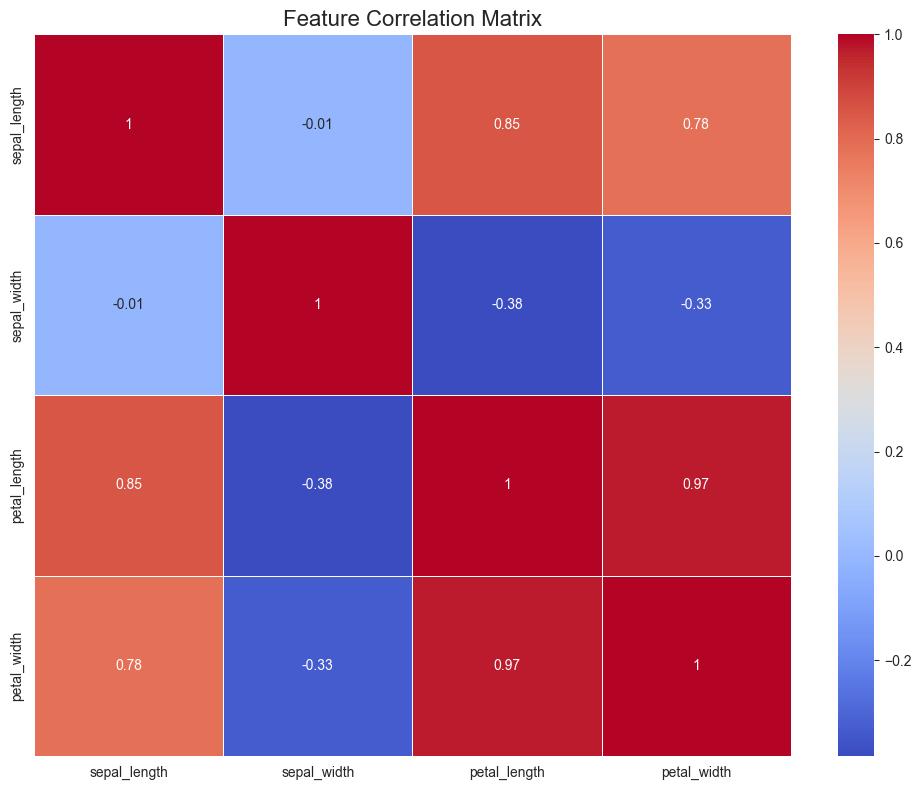

In [53]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [54]:
# Feature distribution summary
print("Feature distribution summary:")
iris_df[numeric_features].describe()

Feature distribution summary:


,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.782222,3.011111,3.748889,1.195556
std,0.880157,0.421158,1.807135,0.793713
min,4.300000,2.000000,1.100000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.500000,3.200000,5.100000,1.800000
max,7.600000,4.000000,6.600000,2.500000


In [55]:
# Feature distribution by species
print("Feature statistics by species:")
iris_df.groupby('species')[numeric_features].agg(['mean', 'std', 'min', 'max'])

Feature statistics by species:


/var/folders/c3/02z5_v456blb2nhq7w9995kw0000gn/T/ipykernel_5295/3875164837.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_df.groupby('species')[numeric_features].agg(['mean', 'std', 'min', 'max'])


sepal_length                     sepal_width                 \
                        mean       std  min  max        mean       std  min   
species                                                                       
Iris-setosa         4.913333  0.397971  4.3  5.8    3.346667  0.344065  2.9   
Iris-versicolor     5.973333  0.656252  4.9  7.0    2.780000  0.391335  2.0   
Iris-virginica      6.460000  0.710935  4.9  7.6    2.906667  0.310453  2.5   

                     petal_length                     petal_width            \
                 max         mean       std  min  max        mean       std   
species                                                                       
Iris-setosa      4.0     1.420000  0.147358  1.1  1.7    0.200000  0.075593   
Iris-versicolor  3.3     4.246667  0.502660  3.3  4.9    1.333333  0.195180   
Iris-virginica   3.6     5.580000  0.565938  4.5  6.6    2.053333  0.255976   

                           
                 min  max  
species                    
Iris-setosa      0.1  0.4  
Iris-versicolor  1.0  1.6  
Iris-virginica   1.7  2.5

<Figure size 1200x1000 with 0 Axes>

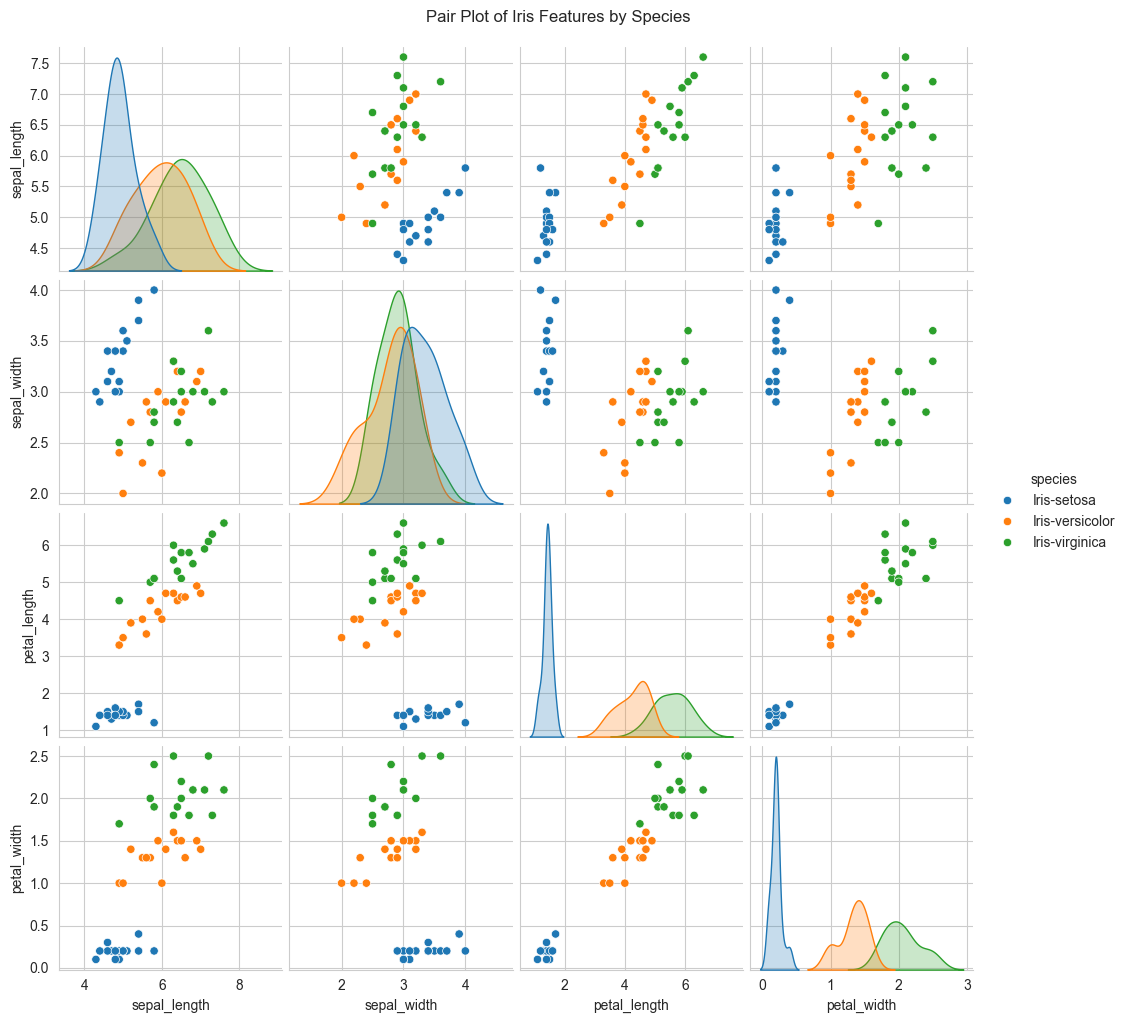

In [56]:
# Create pair plot for all features
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()